In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
gt_Exam = pd.read_csv("G&T_Exam.csv")

In [3]:
gt_Exam

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,4/8/2017 6:44:01,1,6.0,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,4/7/2017 10:40:45,K,NaN,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,4/7/2017 10:41:56,1,NaN,March,27,96,42,99,98,NaN,NaN,Maybe
3,4/7/2017 10:43:31,K,NaN,September,23,97,40,99,98,NaN,NaN,NaN
4,4/10/2017 10:18:34,K,22.0,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
...,...,...,...,...,...,...,...,...,...,...,...,...
112,6/20/2017 16:06:54,1,2.0,August,30,99,44,99,99,"Lower Lab, Anderson, PS 11, NEST + m, Ps 33",Lower lab (off waitlist),Yes
113,6/21/2017 22:52:59,K,20.0,July,97,97,97,99,98,PS229,Ps205,Yes
114,9/14/2017 16:39:55,K,32.0,February,26,99,40,99,99,NaN,NaN,Maybe
115,11/19/2017 17:07:05,K,4.0,April,19,84,33,95,91,Ps 102,Ps102,Yes


In [4]:
# Rename columns so that they can be single words
gt_Exam.rename(columns={"Entering Grade Level":"Entering_Grade_Level", "Birth Month":"Birth_Month", 
                        "OLSAT Verbal Score":"OLSAT_Verbal_Score", "OLSAT Verbal Percentile":"OLSAT_Verbal_Percentile", 
                        "NNAT Non Verbal Raw Score":"NNAT_Non_Verbal_Raw_Score", "NNAT Non Verbal Percentile":"NNAT_Non_Verbal_Percentile", 
                        "Overall Score":"Overall_Score", "School Preferences":"School_Preferences", "School Assigned":"School_Assigned", 
                        "Will you enroll there?":"Will_You_Enroll_There"}, inplace=True)

In [5]:
gt_Exam.dtypes

Timestamp                      object
Entering_Grade_Level           object
District                      float64
Birth_Month                    object
OLSAT_Verbal_Score             object
OLSAT_Verbal_Percentile        object
NNAT_Non_Verbal_Raw_Score      object
NNAT_Non_Verbal_Percentile      int64
Overall_Score                   int64
School_Preferences             object
School_Assigned                object
Will_You_Enroll_There          object
dtype: object

In [6]:
# Convert columns to the right datatypes
gt_Exam["Timestamp"] = pd.to_datetime(gt_Exam["Timestamp"], errors="coerce")
gt_Exam["OLSAT_Verbal_Score"] = pd.to_numeric(gt_Exam["OLSAT_Verbal_Score"], errors="coerce")
gt_Exam = gt_Exam.fillna(gt_Exam["OLSAT_Verbal_Score"])
gt_Exam["OLSAT_Verbal_Percentile"] = pd.to_numeric(gt_Exam["OLSAT_Verbal_Percentile"], errors="coerce")
gt_Exam = gt_Exam.fillna(gt_Exam["OLSAT_Verbal_Percentile"])
gt_Exam["NNAT_Non_Verbal_Percentile"] = gt_Exam["NNAT_Non_Verbal_Percentile"].astype("float", errors="ignore")
gt_Exam["NNAT_Non_Verbal_Raw_Score"] = pd.to_numeric(gt_Exam["NNAT_Non_Verbal_Raw_Score"], errors="coerce")
gt_Exam = gt_Exam.fillna(gt_Exam["NNAT_Non_Verbal_Raw_Score"])
gt_Exam["Overall_Score"] = gt_Exam["Overall_Score"].astype("float", errors="ignore")
gt_Exam["Will_You_Enroll_There"] = gt_Exam["Will_You_Enroll_There"].astype("category", errors="ignore")

In [7]:
gt_Exam.dtypes

Timestamp                     datetime64[ns]
Entering_Grade_Level                  object
District                             float64
Birth_Month                           object
OLSAT_Verbal_Score                   float64
OLSAT_Verbal_Percentile              float64
NNAT_Non_Verbal_Raw_Score            float64
NNAT_Non_Verbal_Percentile           float64
Overall_Score                        float64
School_Preferences                    object
School_Assigned                       object
Will_You_Enroll_There               category
dtype: object

In [8]:
gt_Exam.isnull().sum()

Timestamp                      0
Entering_Grade_Level           0
District                      16
Birth_Month                    0
OLSAT_Verbal_Score             8
OLSAT_Verbal_Percentile        1
NNAT_Non_Verbal_Raw_Score      8
NNAT_Non_Verbal_Percentile     0
Overall_Score                  0
School_Preferences            42
School_Assigned               88
Will_You_Enroll_There         46
dtype: int64

In [9]:
gt_Exam[gt_Exam["District"].isnull()]

,Timestamp,Entering_Grade_Level,District,Birth_Month,OLSAT_Verbal_Score,OLSAT_Verbal_Percentile,NNAT_Non_Verbal_Raw_Score,NNAT_Non_Verbal_Percentile,Overall_Score,School_Preferences,School_Assigned,Will_You_Enroll_There
1,2017-04-07 10:40:45,K,NaN,August,25.0,99.0,39.0,99.0,99.0,"Anderson, NEST+m",NaN,Maybe
2,2017-04-07 10:41:56,1,NaN,March,27.0,96.0,42.0,99.0,98.0,NaN,NaN,Maybe
3,2017-04-07 10:43:31,K,NaN,September,23.0,97.0,40.0,99.0,98.0,NaN,NaN,NaN
5,2017-04-07 11:03:21,K,NaN,May,24.0,97.0,36.0,98.0,98.0,NaN,NaN,NaN
6,2017-04-07 11:15:28,K,NaN,February,26.0,99.0,42.0,99.0,99.0,Anderson NEST TAG Q300,NaN,NaN
7,2017-04-07 11:26:16,K,NaN,October,24.0,99.0,42.0,99.0,99.0,"Nest+M, Anderson",NaN,Yes
8,2017-04-07 11:31:41,1,NaN,March,23.0,81.0,42.0,99.0,95.0,NaN,NaN,NaN
9,2017-04-07 11:32:52,2,NaN,April,29.0,99.0,44.0,99.0,99.0,Any citywide or district 3 school,NaN,Yes
10,2017-04-07 11:57:06,K,NaN,June,17.0,77.0,39.0,99.0,94.0,NaN,NaN,Maybe
11,2017-04-07 12:03:49,K,NaN,December,23.0,98.0,45.0,99.0,99.0,NaN,NaN,NaN


In [10]:
# Forward Fill the District
gt_Exam["District"].ffill(axis=0, inplace=True)

In [11]:
gt_Exam

,Timestamp,Entering_Grade_Level,District,Birth_Month,OLSAT_Verbal_Score,OLSAT_Verbal_Percentile,NNAT_Non_Verbal_Raw_Score,NNAT_Non_Verbal_Percentile,Overall_Score,School_Preferences,School_Assigned,Will_You_Enroll_There
0,2017-04-08 06:44:01,1,6.0,September,28.0,99.0,45.0,99.0,99.0,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04-07 10:40:45,K,6.0,August,25.0,99.0,39.0,99.0,99.0,"Anderson, NEST+m",NaN,Maybe
2,2017-04-07 10:41:56,1,6.0,March,27.0,96.0,42.0,99.0,98.0,NaN,NaN,Maybe
3,2017-04-07 10:43:31,K,6.0,September,23.0,97.0,40.0,99.0,98.0,NaN,NaN,NaN
4,2017-04-10 10:18:34,K,22.0,April,25.0,98.0,38.0,99.0,99.0,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
...,...,...,...,...,...,...,...,...,...,...,...,...
112,2017-06-20 16:06:54,1,2.0,August,30.0,99.0,44.0,99.0,99.0,"Lower Lab, Anderson, PS 11, NEST + m, Ps 33",Lower lab (off waitlist),Yes
113,2017-06-21 22:52:59,K,20.0,July,97.0,97.0,97.0,99.0,98.0,PS229,Ps205,Yes
114,2017-09-14 16:39:55,K,32.0,February,26.0,99.0,40.0,99.0,99.0,NaN,NaN,Maybe
115,2017-11-19 17:07:05,K,4.0,April,19.0,84.0,33.0,95.0,91.0,Ps 102,Ps102,Yes


In [12]:
gt_Exam[gt_Exam["School_Preferences"].isnull()]

,Timestamp,Entering_Grade_Level,District,Birth_Month,OLSAT_Verbal_Score,OLSAT_Verbal_Percentile,NNAT_Non_Verbal_Raw_Score,NNAT_Non_Verbal_Percentile,Overall_Score,School_Preferences,School_Assigned,Will_You_Enroll_There
2,2017-04-07 10:41:56,1,6.0,March,27.0,96.0,42.0,99.0,98.0,NaN,NaN,Maybe
3,2017-04-07 10:43:31,K,6.0,September,23.0,97.0,40.0,99.0,98.0,NaN,NaN,NaN
5,2017-04-07 11:03:21,K,22.0,May,24.0,97.0,36.0,98.0,98.0,NaN,NaN,NaN
8,2017-04-07 11:31:41,1,22.0,March,23.0,81.0,42.0,99.0,95.0,NaN,NaN,NaN
10,2017-04-07 11:57:06,K,22.0,June,17.0,77.0,39.0,99.0,94.0,NaN,NaN,Maybe
11,2017-04-07 12:03:49,K,22.0,December,23.0,98.0,45.0,99.0,99.0,NaN,NaN,NaN
12,2017-04-07 12:36:07,1,22.0,July,24.0,86.0,39.0,98.0,94.0,NaN,NaN,NaN
13,2017-04-07 12:42:05,1,22.0,May,29.0,99.0,48.0,99.0,99.0,NaN,NaN,NaN
14,2017-04-07 13:00:25,1,22.0,January,28.0,96.0,43.0,99.0,98.0,NaN,NaN,NaN
15,2017-04-07 13:16:38,K,22.0,January,26.0,99.0,40.0,99.0,99.0,NaN,NaN,NaN


In [13]:
# Forward Fill the School Preferences
gt_Exam["School_Preferences"].ffill(axis=0, inplace=True)

In [14]:
gt_Exam

,Timestamp,Entering_Grade_Level,District,Birth_Month,OLSAT_Verbal_Score,OLSAT_Verbal_Percentile,NNAT_Non_Verbal_Raw_Score,NNAT_Non_Verbal_Percentile,Overall_Score,School_Preferences,School_Assigned,Will_You_Enroll_There
0,2017-04-08 06:44:01,1,6.0,September,28.0,99.0,45.0,99.0,99.0,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04-07 10:40:45,K,6.0,August,25.0,99.0,39.0,99.0,99.0,"Anderson, NEST+m",NaN,Maybe
2,2017-04-07 10:41:56,1,6.0,March,27.0,96.0,42.0,99.0,98.0,"Anderson, NEST+m",NaN,Maybe
3,2017-04-07 10:43:31,K,6.0,September,23.0,97.0,40.0,99.0,98.0,"Anderson, NEST+m",NaN,NaN
4,2017-04-10 10:18:34,K,22.0,April,25.0,98.0,38.0,99.0,99.0,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
...,...,...,...,...,...,...,...,...,...,...,...,...
112,2017-06-20 16:06:54,1,2.0,August,30.0,99.0,44.0,99.0,99.0,"Lower Lab, Anderson, PS 11, NEST + m, Ps 33",Lower lab (off waitlist),Yes
113,2017-06-21 22:52:59,K,20.0,July,97.0,97.0,97.0,99.0,98.0,PS229,Ps205,Yes
114,2017-09-14 16:39:55,K,32.0,February,26.0,99.0,40.0,99.0,99.0,PS229,NaN,Maybe
115,2017-11-19 17:07:05,K,4.0,April,19.0,84.0,33.0,95.0,91.0,Ps 102,Ps102,Yes


In [15]:
pd.options.display.max_columns = None

In [16]:
pd.options.display.max_rows = None

In [17]:
gt_Exam

,Timestamp,Entering_Grade_Level,District,Birth_Month,OLSAT_Verbal_Score,OLSAT_Verbal_Percentile,NNAT_Non_Verbal_Raw_Score,NNAT_Non_Verbal_Percentile,Overall_Score,School_Preferences,School_Assigned,Will_You_Enroll_There
0,2017-04-08 06:44:01,1,6.0,September,28.0,99.0,45.0,99.0,99.0,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04-07 10:40:45,K,6.0,August,25.0,99.0,39.0,99.0,99.0,"Anderson, NEST+m",NaN,Maybe
2,2017-04-07 10:41:56,1,6.0,March,27.0,96.0,42.0,99.0,98.0,"Anderson, NEST+m",NaN,Maybe
3,2017-04-07 10:43:31,K,6.0,September,23.0,97.0,40.0,99.0,98.0,"Anderson, NEST+m",NaN,NaN
4,2017-04-10 10:18:34,K,22.0,April,25.0,98.0,38.0,99.0,99.0,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04-07 11:03:21,K,22.0,May,24.0,97.0,36.0,98.0,98.0,Brooklyn School of Inquiry,NaN,NaN
6,2017-04-07 11:15:28,K,22.0,February,26.0,99.0,42.0,99.0,99.0,Anderson NEST TAG Q300,NaN,NaN
7,2017-04-07 11:26:16,K,22.0,October,24.0,99.0,42.0,99.0,99.0,"Nest+M, Anderson",NaN,Yes
8,2017-04-07 11:31:41,1,22.0,March,23.0,81.0,42.0,99.0,95.0,"Nest+M, Anderson",NaN,NaN
9,2017-04-07 11:32:52,2,22.0,April,29.0,99.0,44.0,99.0,99.0,Any citywide or district 3 school,NaN,Yes


In [18]:
#Convert Null "School_Assigned" Values that have a Any citywide or district 3 school "School_Preferences" to any District 3 schoool
for i in range(len(gt_Exam)):
    if gt_Exam.iloc[i, 9] == "Any citywide or district 3 school":
        gt_Exam.iloc[i, 10] = "Anderson"

In [19]:
gt_Exam

,Timestamp,Entering_Grade_Level,District,Birth_Month,OLSAT_Verbal_Score,OLSAT_Verbal_Percentile,NNAT_Non_Verbal_Raw_Score,NNAT_Non_Verbal_Percentile,Overall_Score,School_Preferences,School_Assigned,Will_You_Enroll_There
0,2017-04-08 06:44:01,1,6.0,September,28.0,99.0,45.0,99.0,99.0,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04-07 10:40:45,K,6.0,August,25.0,99.0,39.0,99.0,99.0,"Anderson, NEST+m",NaN,Maybe
2,2017-04-07 10:41:56,1,6.0,March,27.0,96.0,42.0,99.0,98.0,"Anderson, NEST+m",NaN,Maybe
3,2017-04-07 10:43:31,K,6.0,September,23.0,97.0,40.0,99.0,98.0,"Anderson, NEST+m",NaN,NaN
4,2017-04-10 10:18:34,K,22.0,April,25.0,98.0,38.0,99.0,99.0,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04-07 11:03:21,K,22.0,May,24.0,97.0,36.0,98.0,98.0,Brooklyn School of Inquiry,NaN,NaN
6,2017-04-07 11:15:28,K,22.0,February,26.0,99.0,42.0,99.0,99.0,Anderson NEST TAG Q300,NaN,NaN
7,2017-04-07 11:26:16,K,22.0,October,24.0,99.0,42.0,99.0,99.0,"Nest+M, Anderson",NaN,Yes
8,2017-04-07 11:31:41,1,22.0,March,23.0,81.0,42.0,99.0,95.0,"Nest+M, Anderson",NaN,NaN
9,2017-04-07 11:32:52,2,22.0,April,29.0,99.0,44.0,99.0,99.0,Any citywide or district 3 school,Anderson,Yes


In [20]:
school_preferences = gt_Exam["School_Preferences"].str.split(',')

In [21]:
# Replace the missing values in school assigned with the first element in the array that has been created
# from School_Preferences
for i in range(len(gt_Exam)):
    if pd.isna(gt_Exam.iloc[i, 10]) == True:
               gt_Exam.iloc[i, 10] = school_preferences[i][0]

In [22]:
gt_Exam

,Timestamp,Entering_Grade_Level,District,Birth_Month,OLSAT_Verbal_Score,OLSAT_Verbal_Percentile,NNAT_Non_Verbal_Raw_Score,NNAT_Non_Verbal_Percentile,Overall_Score,School_Preferences,School_Assigned,Will_You_Enroll_There
0,2017-04-08 06:44:01,1,6.0,September,28.0,99.0,45.0,99.0,99.0,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04-07 10:40:45,K,6.0,August,25.0,99.0,39.0,99.0,99.0,"Anderson, NEST+m",Anderson,Maybe
2,2017-04-07 10:41:56,1,6.0,March,27.0,96.0,42.0,99.0,98.0,"Anderson, NEST+m",Anderson,Maybe
3,2017-04-07 10:43:31,K,6.0,September,23.0,97.0,40.0,99.0,98.0,"Anderson, NEST+m",Anderson,NaN
4,2017-04-10 10:18:34,K,22.0,April,25.0,98.0,38.0,99.0,99.0,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04-07 11:03:21,K,22.0,May,24.0,97.0,36.0,98.0,98.0,Brooklyn School of Inquiry,Brooklyn School of Inquiry,NaN
6,2017-04-07 11:15:28,K,22.0,February,26.0,99.0,42.0,99.0,99.0,Anderson NEST TAG Q300,Anderson NEST TAG Q300,NaN
7,2017-04-07 11:26:16,K,22.0,October,24.0,99.0,42.0,99.0,99.0,"Nest+M, Anderson",Nest+M,Yes
8,2017-04-07 11:31:41,1,22.0,March,23.0,81.0,42.0,99.0,95.0,"Nest+M, Anderson",Nest+M,NaN
9,2017-04-07 11:32:52,2,22.0,April,29.0,99.0,44.0,99.0,99.0,Any citywide or district 3 school,Anderson,Yes


In [23]:
gt_Exam.Will_You_Enroll_There.value_counts()

Yes      44
Maybe    22
No        4
YES       1
Name: Will_You_Enroll_There, dtype: int64

In [24]:
# Replace YES category with yes
gt_Exam["Will_You_Enroll_There"] = gt_Exam["Will_You_Enroll_There"].str.capitalize()

In [25]:
# Replace the missing values of Will_You_Enroll_There with the answer that got the most counts for that particular
# School_Assigned
gt_Exam['Will_You_Enroll_There'] = gt_Exam['Will_You_Enroll_There'].fillna(gt_Exam.groupby('School_Assigned')['Will_You_Enroll_There'].transform(lambda s: pd.Series.mode(s).get(0)))

In [26]:
gt_Exam

,Timestamp,Entering_Grade_Level,District,Birth_Month,OLSAT_Verbal_Score,OLSAT_Verbal_Percentile,NNAT_Non_Verbal_Raw_Score,NNAT_Non_Verbal_Percentile,Overall_Score,School_Preferences,School_Assigned,Will_You_Enroll_There
0,2017-04-08 06:44:01,1,6.0,September,28.0,99.0,45.0,99.0,99.0,"NEST+m, TAG, Anderson, Q300",NEST,Yes
1,2017-04-07 10:40:45,K,6.0,August,25.0,99.0,39.0,99.0,99.0,"Anderson, NEST+m",Anderson,Maybe
2,2017-04-07 10:41:56,1,6.0,March,27.0,96.0,42.0,99.0,98.0,"Anderson, NEST+m",Anderson,Maybe
3,2017-04-07 10:43:31,K,6.0,September,23.0,97.0,40.0,99.0,98.0,"Anderson, NEST+m",Anderson,Yes
4,2017-04-10 10:18:34,K,22.0,April,25.0,98.0,38.0,99.0,99.0,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04-07 11:03:21,K,22.0,May,24.0,97.0,36.0,98.0,98.0,Brooklyn School of Inquiry,Brooklyn School of Inquiry,Yes
6,2017-04-07 11:15:28,K,22.0,February,26.0,99.0,42.0,99.0,99.0,Anderson NEST TAG Q300,Anderson NEST TAG Q300,NaN
7,2017-04-07 11:26:16,K,22.0,October,24.0,99.0,42.0,99.0,99.0,"Nest+M, Anderson",Nest+M,Yes
8,2017-04-07 11:31:41,1,22.0,March,23.0,81.0,42.0,99.0,95.0,"Nest+M, Anderson",Nest+M,Yes
9,2017-04-07 11:32:52,2,22.0,April,29.0,99.0,44.0,99.0,99.0,Any citywide or district 3 school,Anderson,Yes


In [27]:
# Drop School Assigned As na or none
gt_Exam = gt_Exam[(gt_Exam["School_Assigned"] != "none") & (gt_Exam["School_Assigned"] != "na")]

In [28]:
# Drop any Null Values in Will_You_Enroll_There Column
gt_Exam.dropna(axis=0, subset=["Will_You_Enroll_There"], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [29]:
gt_Exam

,Timestamp,Entering_Grade_Level,District,Birth_Month,OLSAT_Verbal_Score,OLSAT_Verbal_Percentile,NNAT_Non_Verbal_Raw_Score,NNAT_Non_Verbal_Percentile,Overall_Score,School_Preferences,School_Assigned,Will_You_Enroll_There
0,2017-04-08 06:44:01,1,6.0,September,28.0,99.0,45.0,99.0,99.0,"NEST+m, TAG, Anderson, Q300",NEST,Yes
1,2017-04-07 10:40:45,K,6.0,August,25.0,99.0,39.0,99.0,99.0,"Anderson, NEST+m",Anderson,Maybe
2,2017-04-07 10:41:56,1,6.0,March,27.0,96.0,42.0,99.0,98.0,"Anderson, NEST+m",Anderson,Maybe
3,2017-04-07 10:43:31,K,6.0,September,23.0,97.0,40.0,99.0,98.0,"Anderson, NEST+m",Anderson,Yes
4,2017-04-10 10:18:34,K,22.0,April,25.0,98.0,38.0,99.0,99.0,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04-07 11:03:21,K,22.0,May,24.0,97.0,36.0,98.0,98.0,Brooklyn School of Inquiry,Brooklyn School of Inquiry,Yes
7,2017-04-07 11:26:16,K,22.0,October,24.0,99.0,42.0,99.0,99.0,"Nest+M, Anderson",Nest+M,Yes
8,2017-04-07 11:31:41,1,22.0,March,23.0,81.0,42.0,99.0,95.0,"Nest+M, Anderson",Nest+M,Yes
9,2017-04-07 11:32:52,2,22.0,April,29.0,99.0,44.0,99.0,99.0,Any citywide or district 3 school,Anderson,Yes
10,2017-04-07 11:57:06,K,22.0,June,17.0,77.0,39.0,99.0,94.0,Any citywide or district 3 school,Anderson,Maybe


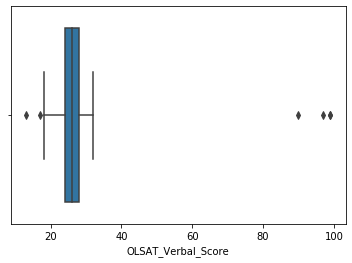

In [30]:
# Decide whether to impute the missing values of the OLSAT_Verbal_Score with the mean/median
sns.boxplot(gt_Exam.OLSAT_Verbal_Score)

In [31]:
# Use the mean since the data is not skewed
mean = gt_Exam["OLSAT_Verbal_Score"].mean()

In [32]:
gt_Exam["OLSAT_Verbal_Score"].fillna(mean, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [33]:
pd.options.display.float_format = "{:,.2f}".format

In [34]:
gt_Exam

,Timestamp,Entering_Grade_Level,District,Birth_Month,OLSAT_Verbal_Score,OLSAT_Verbal_Percentile,NNAT_Non_Verbal_Raw_Score,NNAT_Non_Verbal_Percentile,Overall_Score,School_Preferences,School_Assigned,Will_You_Enroll_There
0,2017-04-08 06:44:01,1,6.00,September,28.00,99.00,45.00,99.00,99.00,"NEST+m, TAG, Anderson, Q300",NEST,Yes
1,2017-04-07 10:40:45,K,6.00,August,25.00,99.00,39.00,99.00,99.00,"Anderson, NEST+m",Anderson,Maybe
2,2017-04-07 10:41:56,1,6.00,March,27.00,96.00,42.00,99.00,98.00,"Anderson, NEST+m",Anderson,Maybe
3,2017-04-07 10:43:31,K,6.00,September,23.00,97.00,40.00,99.00,98.00,"Anderson, NEST+m",Anderson,Yes
4,2017-04-10 10:18:34,K,22.00,April,25.00,98.00,38.00,99.00,99.00,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04-07 11:03:21,K,22.00,May,24.00,97.00,36.00,98.00,98.00,Brooklyn School of Inquiry,Brooklyn School of Inquiry,Yes
7,2017-04-07 11:26:16,K,22.00,October,24.00,99.00,42.00,99.00,99.00,"Nest+M, Anderson",Nest+M,Yes
8,2017-04-07 11:31:41,1,22.00,March,23.00,81.00,42.00,99.00,95.00,"Nest+M, Anderson",Nest+M,Yes
9,2017-04-07 11:32:52,2,22.00,April,29.00,99.00,44.00,99.00,99.00,Any citywide or district 3 school,Anderson,Yes
10,2017-04-07 11:57:06,K,22.00,June,17.00,77.00,39.00,99.00,94.00,Any citywide or district 3 school,Anderson,Maybe


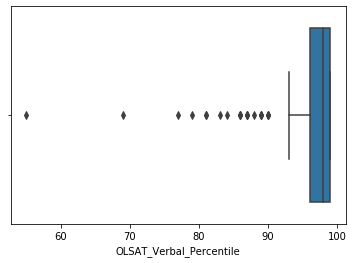

In [35]:
sns.boxplot(gt_Exam.OLSAT_Verbal_Percentile)

In [36]:
# Use the median since the data is skewed
median = gt_Exam.OLSAT_Verbal_Percentile.median()

In [37]:
gt_Exam.OLSAT_Verbal_Percentile.fillna(median, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


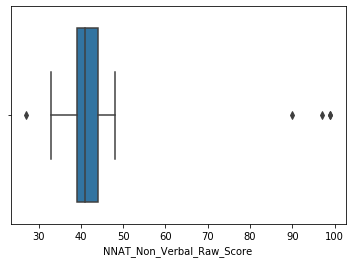

In [38]:
sns.boxplot(gt_Exam.NNAT_Non_Verbal_Raw_Score)

In [39]:
# Use the mean since the data is not skewed
mean_nnat = gt_Exam.NNAT_Non_Verbal_Raw_Score.mean()

In [40]:
gt_Exam.NNAT_Non_Verbal_Raw_Score.fillna(mean_nnat, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


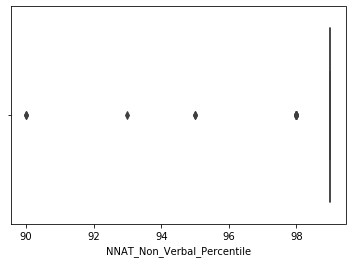

In [41]:
sns.boxplot(gt_Exam.NNAT_Non_Verbal_Percentile)

In [42]:
# Use the mean since the data is not skewed
mean_nnat_percentile = gt_Exam.NNAT_Non_Verbal_Percentile.mean()

In [43]:
gt_Exam.NNAT_Non_Verbal_Percentile.fillna(mean_nnat_percentile, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


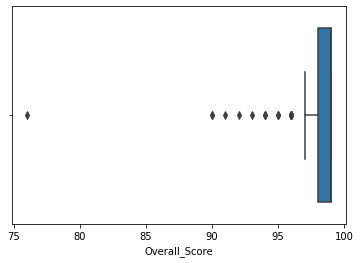

In [44]:
sns.boxplot(gt_Exam.Overall_Score)

In [45]:
# Use the median since the data is skewed
median_overallScore = gt_Exam.Overall_Score.median()

In [46]:
gt_Exam.Overall_Score.fillna(median_overallScore, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [47]:
gt_Exam

,Timestamp,Entering_Grade_Level,District,Birth_Month,OLSAT_Verbal_Score,OLSAT_Verbal_Percentile,NNAT_Non_Verbal_Raw_Score,NNAT_Non_Verbal_Percentile,Overall_Score,School_Preferences,School_Assigned,Will_You_Enroll_There
0,2017-04-08 06:44:01,1,6.00,September,28.00,99.00,45.00,99.00,99.00,"NEST+m, TAG, Anderson, Q300",NEST,Yes
1,2017-04-07 10:40:45,K,6.00,August,25.00,99.00,39.00,99.00,99.00,"Anderson, NEST+m",Anderson,Maybe
2,2017-04-07 10:41:56,1,6.00,March,27.00,96.00,42.00,99.00,98.00,"Anderson, NEST+m",Anderson,Maybe
3,2017-04-07 10:43:31,K,6.00,September,23.00,97.00,40.00,99.00,98.00,"Anderson, NEST+m",Anderson,Yes
4,2017-04-10 10:18:34,K,22.00,April,25.00,98.00,38.00,99.00,99.00,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
5,2017-04-07 11:03:21,K,22.00,May,24.00,97.00,36.00,98.00,98.00,Brooklyn School of Inquiry,Brooklyn School of Inquiry,Yes
7,2017-04-07 11:26:16,K,22.00,October,24.00,99.00,42.00,99.00,99.00,"Nest+M, Anderson",Nest+M,Yes
8,2017-04-07 11:31:41,1,22.00,March,23.00,81.00,42.00,99.00,95.00,"Nest+M, Anderson",Nest+M,Yes
9,2017-04-07 11:32:52,2,22.00,April,29.00,99.00,44.00,99.00,99.00,Any citywide or district 3 school,Anderson,Yes
10,2017-04-07 11:57:06,K,22.00,June,17.00,77.00,39.00,99.00,94.00,Any citywide or district 3 school,Anderson,Maybe


In [48]:
gt_Exam.isnull().sum()

Timestamp                     0
Entering_Grade_Level          0
District                      0
Birth_Month                   0
OLSAT_Verbal_Score            0
OLSAT_Verbal_Percentile       0
NNAT_Non_Verbal_Raw_Score     0
NNAT_Non_Verbal_Percentile    0
Overall_Score                 0
School_Preferences            0
School_Assigned               0
Will_You_Enroll_There         0
dtype: int64

In [49]:
gt_Exam.to_csv("G&T_Exam_Cleaned.csv", index=False)